# Perceptual decision making (2)

In this section, we explain the drift-diffusion model (DDM) and how DDM can account for accuracy and reaction time in perceptual decision-making

In the previous model, we count the number of dots moving to left or right in each frame, and sum the dots moving the two directions after T frames. In this section, we try an alternative approach.

Let's first simulate one simple decision

In [1]:
# This notebook requies the following python packages

# pip install numpy scipy matplotib seaborn

In [1]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

T = 20 # number of frames
D = 10 # number of dots  
f = 0.55 # fraction of dots moving towards the correct direction

N_correct = 0 # counter for dots moving towards the correct direction
N_wrong = 0 # counter for dots moving towards the incorrect direction

In this section, we calculate the difference between the numbers of the *correct* dots and the *incorrect* dots in each frame instead of comparing them in the end

In [4]:
delta = np.empty(T+1) # calculate number difference in each frame
delta[0] = 0

#
for t in range(T): # loop frame
    for i in range(D): # loop dots
        # sampling a direction for a dot
        dir = bernoulli.rvs(f, size=1)[0]

        # update dot counts 
        N_correct = N_correct + dir # correct dot +1
        N_wrong = N_wrong + (1-dir) # incorrect dot +1
    
    # after counting the dots in this frame, calculate and savetheir difference
    delta[t+1] = N_correct - N_wrong

let's visualize such running difference across T frames

Text(0.5, 0, '# of frame')

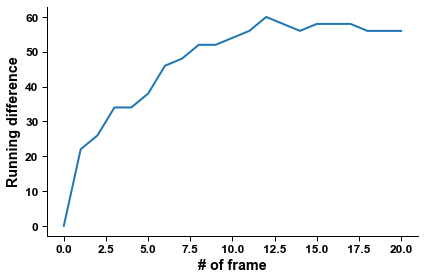

In [5]:
plt.plot(range(T+1), delta)
plt.ylabel('Running difference')
plt.xlabel('# of frame')

According to the Figure above, the running difference between the numbers of the *correct* and the *incorrect* dots flucutates a little bit but the overall trend is going up.

This process can be viewed as a process of evidence accumulation. In each frame, if $N_{correct}$ > $N_{wrong}$, the subject receives a little bit sensory evidence that supports the correct direction, and vice versa if $N_{correct}$ < $N_{wrong}$. If sensory evidence accumulates over time, the total evidence (i.e., decision variable, the blue curve above) increases such that it is more likely that the subject can make a correct choice.

For a stimulus with a fixed duration, the subject makes a decision according to the sign of the decision variable in the end. 

However, for a stimulus duration varied by the subject (i.e., reaction time), how can we model this process? In this scenario, we assumes that the drift-diffusion process stops once the decision variable drifts to a fixed boundary.

In [10]:
B = 40 # a fixed decision boundary
D = 10 # dot number
f = 0.55 # fraction of dots moving to the correct direction

N_correct = 0 # counter for the correct dots
N_wrong = 0 # counter for the incorrect dots


delta = [] # set delta as a list
delta.append(N_correct - N_wrong)

i = 0
while np.abs(delta[i]) < B: # loop until decision varible reach the boundary
    for j in range(D): # loop dots
        # sample the direction of this dot
        dir = bernoulli.rvs(f, size=1)[0] 
        # update the counts
        N_correct = N_correct + dir
        N_wrong = N_wrong + (1-dir)        
    # update frame number
    i = i + 1
    # compute and save sensory difference
    delta.append(N_correct - N_wrong)

# the sign of the accumulated sensory evidence determines the choice
if delta[-1] > 0:
    print('The answer is correct in this trial')
else:
    print('The answer is wrong in this trial')

RT = i
print(f'Reaction time in this trial is {RT} frames')

The answer is correct in this trial
Reaction time in this trial is 22 frames


We can visualize this drift-diffusion process

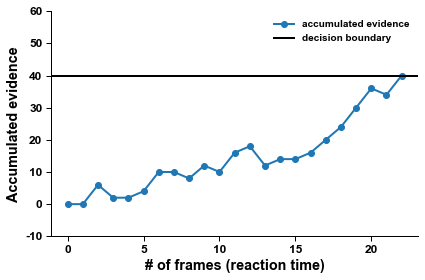

In [11]:
plt.plot(delta, '-o', label='accumulated evidence') # 画出evidence accumulation
plt.axhline(B, color='k', label='decision boundary') # 画出决策边界
plt.ylabel('Accumulated evidence')
plt.xlabel('# of frames (reaction time)')
plt.ylim([-10, 60])
plt.legend()

The code above only simulates the drift-diffusion process in a trial. We now create a function.

In [12]:
def ddm1(D=10, f=0.55, B=40):
    # <D>: number of dots
    # <f>: probability of a dot moving to the correct direction
    # <B>: decision boundary

    i = 0
    N_correct = 0
    N_wrong = 0
    delta = [] # set delta as a list
    delta.append(N_correct - N_wrong)

    while np.abs(delta[i]) < B:
        for j in range(D):
            # sample the direction of this dot
            dir = bernoulli.rvs(f, size=1)[0] 
            # update the counts
            N_correct = N_correct + dir
            N_wrong = N_wrong + (1-dir)
        
        # add one frame
        i = i + 1
        # compute difference
        delta.append(N_correct - N_wrong)

    correct = (delta[-1]>0) #正确与否
    RT = i # reaction time
        
    return correct, RT, delta # 返回正确与否，反应时，整个证据积累的过程

Let's use this function to simulate many trials

Text(0, 0.5, 'Accumulated evidence')

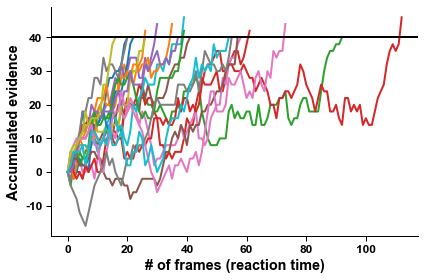

In [13]:
nTrial = 20 # trial number
for i in range(nTrial):
    _,_,delta = ddm1(D=10, f=0.55, B=40)
    plt.plot(delta)
plt.axhline(B, color='k', label='Decision boundary')
plt.xlabel('# of frames (reaction time)')
plt.ylabel('Accumulated evidence')

We can see that the majority accumulated sensory evidence rises but in different speeds. This is a simple random walk process. We can further summarize the reaction time when the evidence reach the boundary.

In [14]:
from seaborn import distplot
from scipy.stats import gamma

nTrial = 1000 # trial number

RT = np.empty(nTrial)

for i in range(nTrial): # loop many trials
    _,RT[i],_ = ddm1(D=10, f=0.55, B=40)

Now we visualize the distribution of reaction time

/Users/ruyuan/opt/miniconda3/envs/mne/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

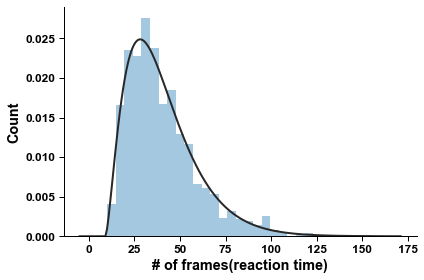

In [15]:
# We visualize the distribution of reaction time
distplot(RT, kde=False, fit=gamma)
plt.xlabel('# of frames(reaction time)')
plt.ylabel('Count')

We can see that reaction time follows a Gamma distribution, which is consistent with the well-established finding in cognitive psychology.


## Summary
1. We calculate the sensory evidence in each frame
2. The overrall sensory evidence accumulates as a drift-diffusion process
3. A choice is triggered when accumulated evidence reaches a fixed decision boundary.
4. The reaction time distribution bears strong resemblance to the empirical reaction time data.